The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13 ms


In [2]:
from pycaret.classification import *
import pandas as pd
import numpy as np
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier

data = pd.read_csv('Collection/titanic_comp/Data/Train_clean (1).csv')
data2 = pd.read_csv('Collection/titanic_comp/Data/Test_clean.csv')
data = data.drop(columns=['Unnamed: 0'])
data2 = data2.drop(columns=['Unnamed: 0'])
data2['Survived'] = 1

time: 3.12 s


In [11]:
col = data.columns
data.head(5)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title
0,0,3,1,2,1,0,0,0,7,1,0,1
1,1,1,0,5,1,0,3,2,2,1,0,3
2,1,3,0,3,0,0,1,0,7,0,1,2
3,1,1,0,5,1,0,3,0,2,1,0,3
4,0,3,1,5,0,0,1,0,7,0,1,1


time: 6.54 ms


In [31]:
data2 = data2[col]

time: 1.83 ms


In [32]:
data2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title
0,1,3,1,5,0,0,0,1,7,0,1,1
1,1,3,0,6,1,0,0,0,7,1,0,3
2,1,2,1,6,0,0,1,1,7,0,1,1
3,1,3,1,3,0,0,1,0,7,0,1,1
4,1,3,0,2,1,1,1,0,7,2,0,3


time: 9.47 ms


In [43]:
%load_ext autotime

from pycaret.classification import *
import pandas as pd
import numpy as np
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier

data = pd.read_csv('Collection/titanic_comp/Data/Train_clean.csv')
data2 = pd.read_csv('Collection/Random_Notebooks/Test_clean.csv')
data = data.drop(columns=['Unnamed: 0'])
data2 = data2.drop(columns=['Unnamed: 0'])
data2['Survived'] = 1
col = data.columns

data2 = data2[col]

grid = setup(data, 
             target='Survived',
             test_data =data2, 
             log_experiment=True,
            polynomial_features=True,
             trigonometry_features=True,
             feature_selection=True,
            feature_interaction=True,
            feature_ratio=True,
             experiment_name='Titanic',
             log_data=True, 
            # profile=True,
             silent=True, 
             verbose=True,
             log_plots=True,
             n_jobs=1)


,Description,Value
0,session_id,1432
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 15)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


time: 40.9 s


In [44]:
get_config('X')

,Deck_F,SibSp_4,Deck_A,sin(Age_imputed),SibSp_5,Parch_2,Fare_1,relatives_5,Age_imputed,relatives_2,...,Sex_female_multiply_Title_2,SibSp_0_multiply_Age_Class,Age_4_multiply_Age_Class,sin(Age_Class)_divide_Age_imputed,Fare_Per_Person_Power2_multiply_Title_1,sin(Age_Class)_divide_sin(Fare_Per_Person),sin(Age_imputed)_divide_sin(Age_Class),Pclass_1_multiply_sin(Age_Class),sin(Age_Class)_multiply_Fare_Per_Person,SibSp_1_multiply_Age_Class
0,0.0,0.0,0.0,-0.521383,0.0,0.0,0.0,0.0,-0.548471,0.0,...,0.0,0.000000,0.000000,-0.148095,9.0,0.575581,-6.418926,0.000000,0.243678,0.081316
1,0.0,0.0,0.0,0.591738,0.0,0.0,0.0,0.0,0.633213,0.0,...,0.0,-0.000000,-0.000000,-1.113750,0.0,1.647056,-0.839058,-0.705241,-24.683435,-0.782763
2,0.0,0.0,0.0,-0.250358,0.0,0.0,1.0,0.0,-0.253050,0.0,...,1.0,0.451635,0.000000,-1.724706,0.0,0.664301,-0.573641,0.000000,3.055060,0.000000
3,0.0,0.0,0.0,0.400119,0.0,0.0,0.0,0.0,0.411647,0.0,...,0.0,-0.000000,-0.000000,-1.865100,0.0,-1.006826,-0.521149,-0.767763,-19.961845,-0.875343
4,0.0,0.0,0.0,0.400119,0.0,0.0,1.0,0.0,0.411647,0.0,...,0.0,1.284854,0.000000,2.330628,64.0,0.969716,0.417053,0.000000,7.675169,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,-0.178237,0.0,0.0,1.0,0.0,-0.179195,0.0,...,0.0,-0.289004,-0.000000,1.590433,0.0,-0.678296,0.625400,-0.000000,-3.704968,-0.000000
887,0.0,0.0,0.0,-0.696162,0.0,0.0,0.0,0.0,-0.770037,0.0,...,1.0,-1.369102,-0.000000,1.272314,0.0,0.991596,0.710566,-0.979729,-29.391857,-0.000000
888,0.0,0.0,0.0,-0.831890,0.0,1.0,0.0,0.0,-0.982505,0.0,...,1.0,-0.000000,-0.000000,0.454368,0.0,0.465541,1.863475,-0.000000,-2.232092,-0.462759
889,0.0,0.0,0.0,-0.250358,0.0,0.0,0.0,0.0,-0.253050,0.0,...,0.0,-1.153082,-0.000000,3.612006,900.0,0.925091,0.273909,-0.914019,-27.420563,-0.000000


time: 144 ms


In [45]:
df = get_config('X')
target = get_config('y')
df2 = get_config('X_test')
df['Survived'] = target


time: 32.2 ms


In [46]:
df2.to_csv('Collection/titanic_comp/Data/feature-test_clean.csv')
df.to_csv('Collection/titanic_comp/Data/feature-train_clean.csv')

time: 111 ms


In [41]:
df.head()

,Deck_2,SibSp_4,SibSp_5,Parch_2,Fare_1,relatives_5,relatives_2,Deck_1,Deck_4,Age_3,...,Age_0,Age_5,Deck_0,Title_4,Deck_5,Title_3,Deck_6,relatives_0,Age_6,Survived
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


time: 17.9 ms


In [47]:
top8 = compare_models(n_select=8)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8429,0.8822,0.7455,0.8267,0.7820,0.6601,0.6641,23.1970
gbc,Gradient Boosting Classifier,0.8283,0.8779,0.7308,0.8037,0.7621,0.6289,0.6338,1.0220
lightgbm,Light Gradient Boosting Machine,0.8238,0.8592,0.7339,0.7925,0.7584,0.6207,0.6252,0.4170
et,Extra Trees Classifier,0.8227,0.8525,0.7398,0.7844,0.7584,0.6192,0.6226,0.3360
xgboost,Extreme Gradient Boosting,0.8216,0.8629,0.7282,0.7902,0.7554,0.6158,0.6194,1.0310
rf,Random Forest Classifier,0.8193,0.8618,0.7164,0.7924,0.7480,0.6087,0.6143,0.4720
ada,Ada Boost Classifier,0.8182,0.8593,0.7221,0.7851,0.7499,0.6080,0.6115,0.3330
lda,Linear Discriminant Analysis,0.8149,0.8674,0.7103,0.7888,0.7435,0.5999,0.6053,0.1170
dt,Decision Tree Classifier,0.7768,0.7444,0.6991,0.7164,0.7049,0.5257,0.5283,0.0310
lr,Logistic Regression,0.7744,0.8132,0.7279,0.6997,0.7093,0.5257,0.5302,5.5300


time: 11min 22s


In [53]:
stacker = stack_models(estimator_list = top8[1:], meta_model = top8[0])
superstack = tune_model(stacker, fold=10, n_iter=100, search_library='optuna', tuner_verbose=8)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.8556,0.7143,0.8333,0.7692,0.6400,0.6447
1,0.8539,0.8893,0.7353,0.8621,0.7937,0.6817,0.6869
2,0.7640,0.7099,0.5882,0.7407,0.6557,0.4798,0.4872
3,0.8427,0.9142,0.8824,0.7500,0.8108,0.6777,0.6843
4,0.8989,0.9142,0.8529,0.8788,0.8657,0.7846,0.7848
5,0.8315,0.8807,0.6765,0.8519,0.7541,0.6284,0.6381
6,0.8539,0.8845,0.7353,0.8621,0.7937,0.6817,0.6869
7,0.7978,0.8733,0.5882,0.8333,0.6897,0.5462,0.5644
8,0.8764,0.9390,0.7941,0.8710,0.8308,0.7338,0.7357
9,0.8652,0.9021,0.7714,0.8710,0.8182,0.7117,0.7150


time: 10h 1min 10s


In [55]:
print(superstack)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=1432, shuffle=False),
                   estimators=[('gbc',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
             

In [26]:
log = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8447,0.7429,0.7429,0.7429,0.5792,0.5792
1,0.8539,0.8719,0.8529,0.7838,0.8169,0.6958,0.6975
2,0.7640,0.7690,0.5882,0.7407,0.6557,0.4798,0.4872
3,0.8876,0.9061,0.9118,0.8158,0.8611,0.7673,0.7706
4,0.8315,0.8901,0.7941,0.7714,0.7826,0.6450,0.6452
5,0.8315,0.8719,0.7353,0.8065,0.7692,0.6369,0.6386
6,0.8202,0.8650,0.6765,0.8214,0.7419,0.6060,0.6127
7,0.8315,0.8511,0.6765,0.8519,0.7541,0.6284,0.6381
8,0.8652,0.9182,0.8529,0.8056,0.8286,0.7176,0.7184
9,0.8539,0.9040,0.8000,0.8235,0.8116,0.6924,0.6926


time: 27.3 s


In [10]:
lor = tune_model(log)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7460,0.8098,0.6087,0.6667,0.6364,0.4419,0.4429
1,0.6984,0.7565,0.5652,0.5909,0.5778,0.3434,0.3436
2,0.8413,0.9022,0.7391,0.8095,0.7727,0.6512,0.6528
3,0.8548,0.8920,0.7727,0.8095,0.7907,0.6797,0.6801
4,0.7903,0.8352,0.7273,0.6957,0.7111,0.5467,0.5470
5,0.7903,0.8369,0.7273,0.6957,0.7111,0.5467,0.5470
6,0.8548,0.8398,0.6818,0.8824,0.7692,0.6659,0.6776
7,0.6774,0.7500,0.5455,0.5455,0.5455,0.2955,0.2955
8,0.6935,0.6142,0.4091,0.6000,0.4865,0.2791,0.2895
9,0.7903,0.8398,0.5909,0.7647,0.6667,0.5174,0.5265


time: 3min 3s


In [11]:
print(lor)

LogisticRegression(C=8.073, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=5790, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 2.16 ms


In [12]:
lir = tune_model(log, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7460,0.8109,0.6087,0.6667,0.6364,0.4419,0.4429
1,0.7143,0.7565,0.5652,0.6190,0.5909,0.3721,0.3730
2,0.8413,0.8935,0.7391,0.8095,0.7727,0.6512,0.6528
3,0.8871,0.9330,0.8636,0.8261,0.8444,0.7559,0.7564
4,0.8226,0.8455,0.7727,0.7391,0.7556,0.6164,0.6168
5,0.8065,0.8415,0.7273,0.7273,0.7273,0.5773,0.5773
6,0.8548,0.8261,0.6818,0.8824,0.7692,0.6659,0.6776
7,0.6935,0.7386,0.5909,0.5652,0.5778,0.3375,0.3377
8,0.6774,0.6165,0.4091,0.5625,0.4737,0.2494,0.2560
9,0.7903,0.8330,0.5909,0.7647,0.6667,0.5174,0.5265


time: 10min 10s


In [13]:
print(lir)

LogisticRegression(C=5.181, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5790, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
time: 3.15 ms


In [3]:
ct = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.8804,0.7826,0.7500,0.7660,0.6268,0.6272
1,0.8095,0.9217,0.6957,0.7619,0.7273,0.5814,0.5828
2,0.8889,0.8913,0.7391,0.9444,0.8293,0.7487,0.7611
3,0.8710,0.9375,0.8182,0.8182,0.8182,0.7182,0.7182
4,0.8387,0.9023,0.7273,0.8000,0.7619,0.6404,0.6420
5,0.8226,0.8108,0.6818,0.7895,0.7317,0.6002,0.6038
6,0.8226,0.8932,0.7273,0.7619,0.7442,0.6085,0.6089
7,0.8226,0.8250,0.6364,0.8235,0.7179,0.5916,0.6021
8,0.7419,0.6915,0.5455,0.6667,0.6000,0.4123,0.4168
9,0.8226,0.8886,0.6818,0.7895,0.7317,0.6002,0.6038


time: 3min 27s


In [4]:
cat = tune_model(ct ,n_iter=50,search_library='optuna', search_algorithm='tpe', tuner_verbose=True, verbose=True, early_stopping='asha',early_stopping_max_iters=25)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.8750,0.8261,0.8261,0.8261,0.7261,0.7261
1,0.8095,0.9000,0.6522,0.7895,0.7143,0.5734,0.5793
2,0.9048,0.9033,0.7826,0.9474,0.8571,0.7867,0.7948
3,0.8710,0.9182,0.8182,0.8182,0.8182,0.7182,0.7182
4,0.8387,0.9023,0.7273,0.8000,0.7619,0.6404,0.6420
5,0.8387,0.8188,0.6818,0.8333,0.7500,0.6327,0.6396
6,0.8226,0.8807,0.7273,0.7619,0.7442,0.6085,0.6089
7,0.8226,0.8364,0.6364,0.8235,0.7179,0.5916,0.6021
8,0.7742,0.6744,0.5909,0.7222,0.6500,0.4858,0.4911
9,0.8387,0.8830,0.7273,0.8000,0.7619,0.6404,0.6420


time: 1h 8min 16s


In [57]:
evaluate_model(superstack)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

time: 502 ms


In [22]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 

# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]

# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

# blend top 5 base models 
blender = blend_models(estimator_list = top5) 

# select best model 
best = automl(optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.0000,0.7200,0.8182,0.7660,0.6276,0.6309
1,0.8254,0.0000,0.7200,0.8182,0.7660,0.6276,0.6309
2,0.8254,0.0000,0.8400,0.7500,0.7925,0.6426,0.6457
3,0.8226,0.0000,0.6667,0.8421,0.7442,0.6112,0.6209
4,0.8226,0.0000,0.7083,0.8095,0.7556,0.6173,0.6207
5,0.8387,0.0000,0.8333,0.7692,0.8000,0.6652,0.6667
6,0.8065,0.0000,0.8333,0.7143,0.7692,0.6043,0.6096
7,0.8548,0.0000,0.6800,0.9444,0.7907,0.6840,0.7057
8,0.8065,0.0000,0.6400,0.8421,0.7273,0.5816,0.5947
9,0.8387,0.0000,0.7200,0.8571,0.7826,0.6559,0.6622


time: 39min 42s


In [58]:
pred_holdout = predict_model(superstack)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.3660,0,0.3660,1.0000,0.5359,0.0000,0.0000


time: 1.08 s


In [6]:
pred_holdout = predict_model(cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8321,0.8886,0.7647,0.8426,0.8018,0.6567,0.6590


time: 557 ms


In [7]:
tom = finalize_model(cat)

time: 1min 2s


In [8]:
print(tom)

time: 3.45 ms


In [24]:
jack = finalize_model(best)


time: 42.5 s


In [25]:
print(jack)

BaggingClassifier(base_estimator=RidgeClassifier(alpha=4.53, class_weight=None,
                                                 copy_X=True,
                                                 fit_intercept=True,
                                                 max_iter=None, normalize=True,
                                                 random_state=1902,
                                                 solver='auto', tol=0.001),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1902, verbose=0,
                  warm_start=False)
time: 3.95 ms


In [26]:
test = pd.read_csv('Collection/titanic_comp/Data/test_clean.csv')


time: 350 ms


In [27]:
y_pred = predict_model(jack, data = test)

time: 1.13 s


In [28]:
print(len(y_pred))

418
time: 2.7 ms


In [29]:
y_pred = y_pred.rename(columns={'Label':'Survived'})

time: 390 ms


In [30]:
test_passenger_df = pd.read_csv('Collection/titanic_comp/Data/test.csv')
tree = test_passenger_df.PassengerId

submission = pd.DataFrame()
submission['PassengerID'] = tree.tolist()
submission['Survived'] = y_pred.Survived.tolist()

submission.head()


,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


time: 533 ms


In [31]:
submission.to_csv("Collection/titanic_comp/Previous_submissions/Pycaret3-submission.csv", index=False)

time: 172 ms


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


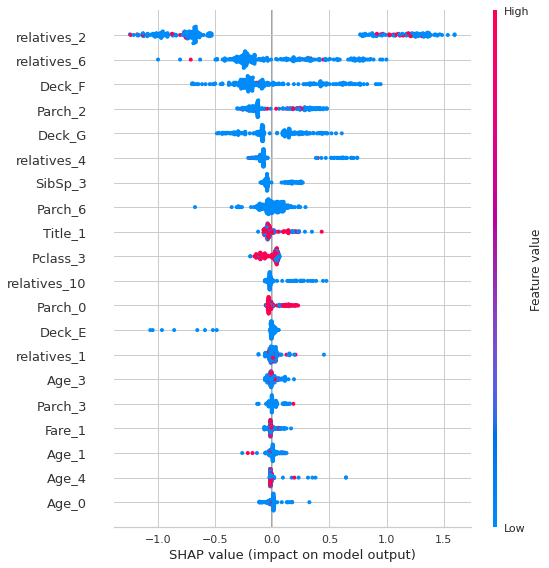

time: 2.77 s


In [33]:
interpret_model(cat)

In [14]:
get_config('prep_pipe')

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=['Unnamed: 0'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Survived',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    random_state=5790,
                                                    subclass='binary',
                                                    target='Survived',
                         

time: 29.5 ms
